In [1]:
%matplotlib notebook

import numpy as np
import pandas as pd
import os
from imp import reload
import matplotlib.pyplot as plt
import h5py
from mpl_toolkits.mplot3d import Axes3D

import cranium

from sklearn.decomposition import PCA

import scipy.stats

In [2]:
wtdir = "C:\\Users\\zfishlab\\Desktop\\zrf1wt13umyot21um\\wt\\Output69semifinal"
yotdir = "C:\\Users\\zfishlab\\Desktop\\zrf1wt13umyot21um\\yot\\Output92semifinal"

wtdf = {}
for f in os.listdir(wtdir):
    if 'AT' in f:
        df = cranium.read_psi(os.path.join(wtdir,f))
        num = f.split('_')[1][:2]
        wtdf[num] = df
        
yotdf = {}
for f in os.listdir(yotdir):
    if 'AT' in f:
        yotdf[f.split('_')[1][:2]] = cranium.read_psi(os.path.join(yotdir,f))

# Arclength

### Raw kde of the data


In [5]:
rawkde = []
for num in wtdf.keys():
    y = wtdf[num].ac
    gkde = scipy.stats.gaussian_kde(y)
    x=np.linspace(y.min(),y.max(),100)
    kde = gkde(x)
    rawkde.append([x,kde])

In [33]:
yrawkde = []
for num in yotdf.keys():
    y = yotdf[num].ac
    gkde = scipy.stats.gaussian_kde(y)
    x = np.linspace(y.min(),y.max(),100)
    kde = gkde(x)
    yrawkde.append([x,kde])

<IPython.core.display.Javascript object>


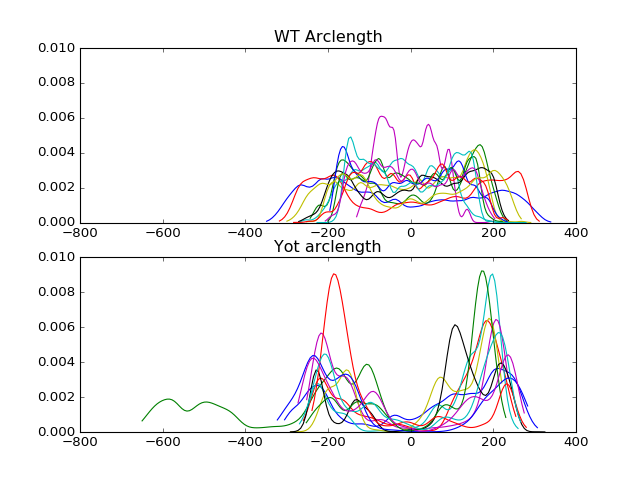

In [39]:
fig = plt.figure()
ax = fig.add_subplot(211)
ay = fig.add_subplot(212,sharey=ax,sharex=ax)

for kde in rawkde:
    ax.plot(kde[0],kde[1])
ax.set_title('WT Arclength')

for kde in yrawkde:
    ay.plot(kde[0],kde[1])
ay.set_title('Yot arclength')

### Rescale data to range from -1 to 1

In [7]:
wtrscale = []
for num in wtdf.keys():
    df = wtdf[num]
    mi,ma = df.ac.min(), df.ac.max()
    
    dfmin = df[df.ac < 0]
    dfmax = df[df.ac >= 0]
    
    dfmin = dfmin.join(pd.DataFrame({'ac_scale':dfmin.ac/np.abs(mi)}))
    dfmax = dfmax.join(pd.DataFrame({'ac_scale':dfmax.ac/np.abs(ma)}))
    
    dfout = dfmin.append(dfmax)
    wtrscale.append(dfout)

In [40]:
yrscale = []
for num in yotdf.keys():
    df = yotdf[num]
    mi,ma = df.ac.min(), df.ac.max()
    
    dfmin = df[df.ac < 0]
    dfmax = df[df.ac >= 0]
    
    dfmin = dfmin.join(pd.DataFrame({'ac_scale':dfmin.ac/np.abs(mi)}))
    dfmax = dfmax.join(pd.DataFrame({'ac_scale':dfmax.ac/np.abs(ma)}))
    
    dfout = dfmin.append(dfmax)
    yrscale.append(dfout)

In [8]:
kderscale = []
for df in wtrscale:
    x = np.linspace(df.ac_scale.min(),df.ac_scale.max())
    gkde = scipy.stats.gaussian_kde(df.ac_scale)
    kde = gkde.evaluate(x)
    kderscale.append([x,kde])

In [41]:
ykderscale = []
for df in yrscale:
    x = np.linspace(df.ac_scale.min(),df.ac_scale.max())
    gkde = scipy.stats.gaussian_kde(df.ac_scale)
    kde = gkde.evaluate(x)
    ykderscale.append([x,kde])

<IPython.core.display.Javascript object>


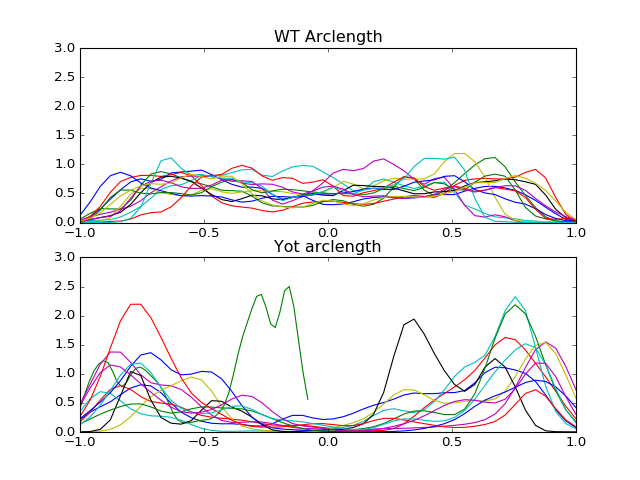

In [44]:
fig = plt.figure()
ax = fig.add_subplot(211)
ay = fig.add_subplot(212,sharey=ax,sharex=ax)

for kde in kderscale:
    ax.plot(kde[0],kde[1])
ax.set_title('WT Arclength')

for kde in ykderscale:
    ay.plot(kde[0],kde[1])
ay.set_title('Yot arclength')

### Absolute value of scaled arclength

In [9]:
kdeabs = []
for df in wtrscale:
    y = np.abs(df.ac_scale.sample(frac=0.01))
    x = np.linspace(y.min(),y.max(),y.size)
    gkde = scipy.stats.gaussian_kde(y)
    kde = gkde.evaluate(x)
    kdeabs.append([x,kde])

In [43]:
ykdeabs = []
for df in yrscale:
    y = np.abs(df.ac_scale.sample(frac=0.01))
    x = np.linspace(y.min(),y.max(),y.size)
    gkde = scipy.stats.gaussian_kde(y)
    kde = gkde.evaluate(x)
    ykdeabs.append([x,kde])

<IPython.core.display.Javascript object>


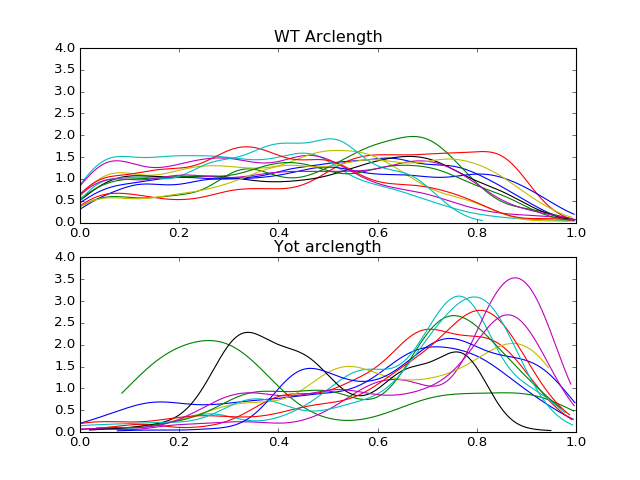

In [45]:
fig = plt.figure()
ax = fig.add_subplot(211)
ay = fig.add_subplot(212,sharey=ax,sharex=ax)

for kde in kdeabs:
    ax.plot(kde[0],kde[1])
ax.set_title('WT Arclength')

for kde in ykdeabs:
    ay.plot(kde[0],kde[1])
ay.set_title('Yot arclength')

### Fit beta distribution

In [12]:
reload(cranium)

<module 'cranium' from 'c:\\users\\zfishlab\\code\\craniumpy\\cranium\\__init__.py'>

In [46]:
wtbeta = pd.DataFrame()
for i,df in enumerate(wtrscale):
    out = cranium.test_beta(np.abs(df.ac_scale.sample(frac=0.01)),i)
    wtbeta = wtbeta.append(out)
wtbeta = wtbeta.set_index('snum')

C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:407: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)


In [25]:
wtbeta

,b_D,b_a,b_b,b_loc,b_p,b_scale,snum
0,0.040484,1.746257,1.755141,-0.021263,4.279974e-24,1.018181,0
0,0.054375,3.479173,2.537060,-0.186681,2.228521e-11,1.186195,1
0,0.062761,2.462097,1.551526,-0.134450,4.066080e-32,1.116223,2
0,0.043169,1.235720,2.542115,-0.000441,6.350375e-05,1.019824,3
0,0.037047,1.142025,2.060136,0.000509,7.389188e-03,0.990277,4
0,0.063182,1.421780,2.174577,-0.005366,3.024029e-17,0.993316,5
0,0.076708,1.252371,1.450117,-0.000365,8.556365e-22,0.975521,6
0,0.032463,1.152737,1.270381,0.000537,5.396150e-04,0.993359,7
0,0.053257,1.338481,1.719369,-0.000934,1.026235e-07,0.995509,8
0,0.046949,1.329658,2.290245,-0.001989,3.161556e-06,1.010505,9


In [26]:
avgbeta = wtbeta[['b_a','b_b','b_loc','b_scale']].mean()
avgbeta

b_a        1.656631
b_b        1.874549
b_loc     -0.033967
b_scale    1.014846
dtype: float64

In [47]:
ybeta = pd.DataFrame()
for i,df in enumerate(yrscale):
    out = cranium.test_beta(np.abs(df.ac_scale.sample(frac=0.01)),i)
    ybeta = ybeta.append(out)
ybeta = ybeta.set_index('snum')

C:\Users\zfishlab\AppData\Local\Continuum\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:407: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*sqrt(a + b + 1) / (a + b + 2) / sqrt(a*b)


In [48]:
ybeta

,b_D,b_a,b_b,b_loc,b_p,b_scale
snum,,,,,,
0,0.076782,2.289835e+00,1.443802,-0.102813,1.071338e-09,1.095709
1,0.186199,1.099096e+00,1.152413,0.016255,0.000000e+00,0.977680
2,0.028385,3.049155e+01,3.002716,-2.676558,3.787094e-01,3.694668
3,0.083402,1.101371e+06,3.258933,-115416.768313,2.315090e-05,115417.781367
4,0.167637,2.332168e+00,0.697054,-0.074579,0.000000e+00,1.072147
5,0.062127,2.979697e+00,1.417266,-0.116631,2.142068e-01,1.103844
6,0.101361,2.721508e+00,2.351590,0.010799,2.042810e-14,0.915628
7,0.040002,4.327344e+00,2.106743,0.031347,2.310869e-01,0.972930
8,0.174012,2.238240e+00,1.262990,0.081001,1.929208e-08,0.868525


In [49]:
yavgbeta = ybeta[['b_a','b_b','b_loc','b_scale']].mean()
yavgbeta

b_a        111695.386855
b_b             1.786797
b_loc      -11934.289855
b_scale     11935.279801
dtype: float64

<IPython.core.display.Javascript object>


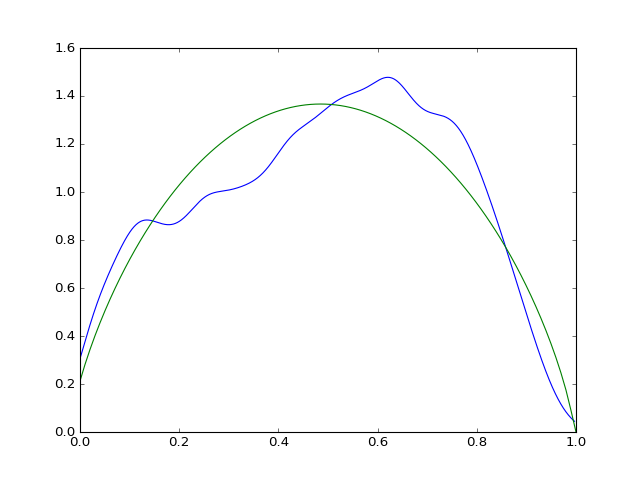

In [29]:
i = 0
kde = kdeabs[i]
x = np.linspace(0,1,100)
pdf = cranium.beta_pdf(x,wtbetai.loc[i][['b_a','b_b','b_loc','b_scale']])
fig,ax = plt.subplots()
ax.plot(kde[0],kde[1])
ax.plot(x,pdf)

<IPython.core.display.Javascript object>


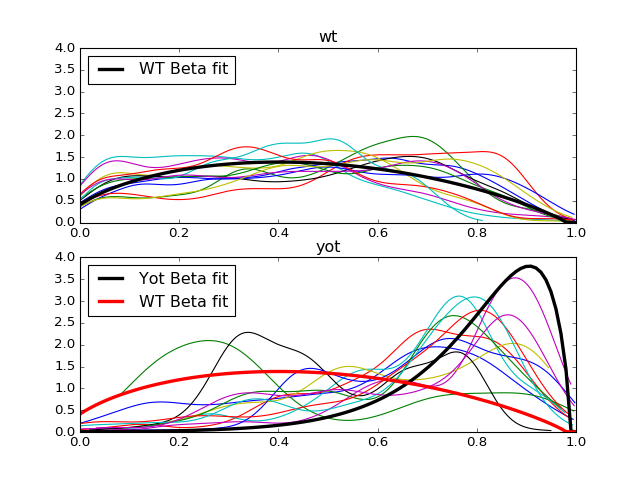

In [105]:
fig = plt.figure()
ax = fig.add_subplot(211)
ay = fig.add_subplot(212,sharey=ax,sharex=ax)

for kde in kdeabs:
    ax.plot(kde[0],kde[1])
x = np.linspace(0,1,100)
pdf = cranium.beta_pdf(x,avgbeta)
ax.plot(x,pdf,c='k',linewidth=3,label='WT Beta fit')

for kde in ykdeabs:
    ay.plot(kde[0],kde[1])
ypdf = cranium.beta_pdf(x,yavgbeta)
ay.plot(x,ypdf,c='k',linewidth=3,label='Yot Beta fit')
ay.plot(x,pdf,c='r',linewidth=3,label='WT Beta fit')

ax.set_title('wt')
ay.set_title('yot')
ax.legend(loc='upper left')
ay.legend(loc='upper left')

# Calculate error

### Between wt and wt fit

In [93]:
wterror = []
for i,df in enumerate(wtrscale):
    y = np.abs(df.ac_scale.sample(frac=0.01))
    wterror.append(cranium.calculate_sample_error(y,avgbeta,'beta',100))

In [94]:
wterror

[0.24533449235518232,
 0.40546898008549004,
 0.54499503095005952,
 0.40454784913866371,
 0.30687003380523536,
 0.24064900364602523,
 0.27346320912777311,
 0.24150507662476606,
 0.15895554128828987,
 0.25892586597519185,
 0.34146162836703459,
 0.15146219418822515,
 0.36063960712816995]

### Between yot and wt fit

In [91]:
yerror = []
for i,df in enumerate(yrscale):
    y = np.abs(df.ac_scale.sample(frac=0.01))
    yerror.append(cranium.calculate_sample_error(y,avgbeta,'beta',100))

In [92]:
yerror

[0.62271199694366863,
 0.62061311467696534,
 0.93748244734084851,
 0.92576169951533072,
 1.3320763565463756,
 0.60458580586315158,
 0.57027150146925354,
 0.94734835001561513,
 1.0315653873585102,
 1.14868631244113,
 1.1294331433322053,
 0.95952745880528056]

In [95]:
ttest = scipy.stats.ttest_ind(wterror,yerror)
print('wt mean =',np.mean(wterror))
print('yt mean =',np.mean(yerror))
ttest

wt mean = 0.302636808668
yt mean = 0.902505297859


Ttest_indResult(statistic=-7.9413517646568543, pvalue=4.8651894280945559e-08)

# R

### KDE

In [67]:
rwtkde = []
for num in wtdf.keys():
    y = wtdf[num].r
    x = np.linspace(y.min(),y.max(),100)
    
    gkde = scipy.stats.gaussian_kde(y)
    kde = gkde.evaluate(x)
    
    rwtkde.append([x,kde])

In [71]:
rykde = []
for num in yotdf.keys():
    y = yotdf[num].r
    x = np.linspace(y.min(),y.max(),100)
    
    gkde = scipy.stats.gaussian_kde(y)
    kde = gkde.evaluate(x)
    
    rykde.append([x,kde])

<IPython.core.display.Javascript object>


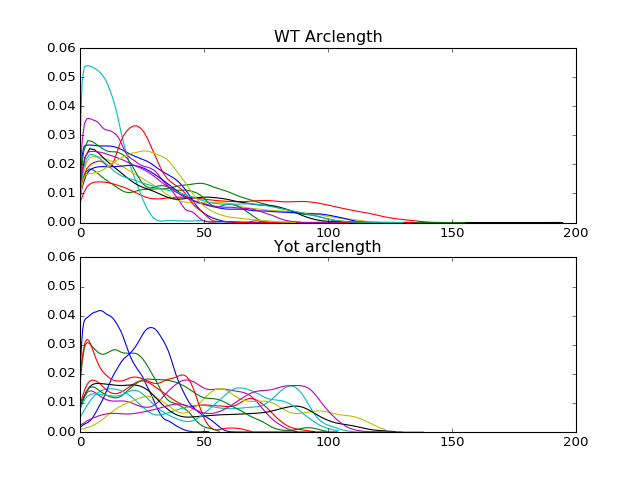

In [72]:
fig = plt.figure()
ax = fig.add_subplot(211)
ay = fig.add_subplot(212,sharey=ax,sharex=ax)

for kde in rwtkde:
    ax.plot(kde[0],kde[1])
ax.set_title('WT Arclength')

for kde in rykde:
    ay.plot(kde[0],kde[1])
ay.set_title('Yot arclength')

### Fit Gamma

In [77]:
reload(cranium)

<module 'cranium' from 'c:\\users\\zfishlab\\code\\craniumpy\\cranium\\__init__.py'>

In [78]:
rwtgamma = pd.DataFrame()
for num in wtdf.keys():
    y = wtdf[num].r.sample(frac=0.01)
    out = cranium.test_gamma(y,num)
    rwtgamma = rwtgamma.append(out)

In [83]:
rwtgamma = rwtgamma.set_index('snum')
rwtgamma

,g_D,g_a,g_loc,g_p,g_scale
snum,,,,,
20,0.055831,2.303460,-1.989726,1.924847e-45,9.815993
04,0.088573,1.525857,-0.798917,1.730816e-29,25.184313
25,0.083561,1.456769,-0.690330,1.323936e-56,35.434188
26,0.042662,1.568132,-0.115586,8.087238e-05,6.823959
14,0.051823,1.516439,-0.264261,3.514924e-05,11.400557
23,0.043250,1.156441,0.003581,2.625375e-08,28.882188
12,0.065997,1.091696,0.001076,3.041915e-16,29.065388
15,0.023463,1.446347,-0.171421,2.733135e-02,22.866292
16,0.057485,1.300160,-0.045045,6.425743e-09,18.563329


In [110]:
rygamma = pd.DataFrame()
for num in yotdf.keys():
    y = yotdf[num].r.sample(frac=0.01)
    out = cranium.test_gamma(y,num)
    rygamma = rygamma.append(out)

In [82]:
rygamma = rygamma.set_index('snum')
rygamma

,g_D,g_a,g_loc,g_p,g_scale
snum,,,,,
4,0.049344,2.080125,-0.904130,2.950321e-04,6.888191
5,0.070139,2.384813,-1.648353,1.332763e-03,8.544477
1,0.068391,1.732675,-1.322751,1.348296e-04,21.211883
15,0.130693,109955.343562,-10155.292245,1.490363e-12,0.092792
3,0.066632,371.610905,-386.186148,5.632349e-05,1.149931
21,0.082408,4853.094567,-1999.518959,3.987430e-02,0.424444
2,0.083547,1.252668,-0.038720,6.301013e-10,33.591188
11,0.033650,20.832368,-24.771559,4.328370e-01,2.502528
19,0.059016,3.440693,-7.881653,2.362159e-01,12.018478


In [84]:
avggamma = rwtgamma[['g_a','g_loc','g_scale']].mean()
avggamma

g_a         2.374297
g_loc      -2.522519
g_scale    18.942669
dtype: float64

In [85]:
yavggamma = rygamma[['g_a','g_loc','g_scale']].mean()
yavggamma

g_a        9662.008809
g_loc     -1126.757491
g_scale       8.879223
dtype: float64

<IPython.core.display.Javascript object>


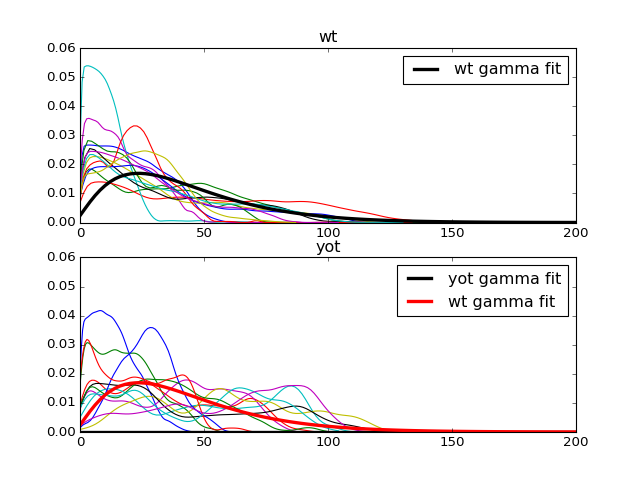

In [106]:
fig = plt.figure()
ax = fig.add_subplot(211)
ay = fig.add_subplot(212,sharey=ax,sharex=ax)

for kde in rwtkde:
    ax.plot(kde[0],kde[1])
x = np.linspace(0,200,100)
pdf = cranium.gamma_pdf(x,avggamma)
ax.plot(x,pdf,c='k',linewidth=3,label='wt gamma fit')

for kde in rykde:
    ay.plot(kde[0],kde[1])
ypdf = cranium.gamma_pdf(x,yavggamma)
ay.plot(x,ypdf,c='k',linewidth=3,label='yot gamma fit')
ay.plot(x,pdf,c='r',linewidth=3,label='wt gamma fit')

ax.set_title('wt')
ay.set_title('yot')
ax.legend()
ay.legend()

## Error

### Between wt and wt fit

In [99]:
rwterror = []
for num in wtdf.keys():
    y = wtdf[num].r.sample(frac=0.01)
    rwterror.append(cranium.calculate_sample_error(y,avggamma,'gamma',100))

In [100]:
rwterror

[0.0091111854243078865,
 0.0031627415229992868,
 0.0037268116221694822,
 0.019736088279934626,
 0.010523976763906324,
 0.0040542838844605618,
 0.0044143287071413658,
 0.0033423003475186817,
 0.0068401731791118752,
 0.0070831581780966407,
 0.0035226915872381818,
 0.0055112751081711269,
 0.0056577984511305647]

In [101]:
ryerror = []
for num in yotdf.keys():
    y = yotdf[num].r.sample(frac=0.01)
    ryerror.append(cranium.calculate_sample_error(y,avggamma,'gamma',100))

In [102]:
ryerror

[0.018162459878401326,
 0.010421871381109629,
 0.0029970456752492734,
 0.0050204264352847828,
 0.0048795258704997287,
 0.0048299544578929657,
 0.0035103396133455574,
 0.0097765302835756303,
 0.0027530983509602086,
 0.0064413204569922656,
 0.0054412504256399121,
 0.0070959499588641069]

In [103]:
ttestr = scipy.stats.ttest_ind(rwterror,ryerror)
print('wt mean =',np.mean(rwterror))
print('yot mean =',np.mean(ryerror))
ttestr

wt mean = 0.00666821638894
yot mean = 0.00677748106565


Ttest_indResult(statistic=-0.061466953264651791, pvalue=0.95151835303549281)

# Saving data to csv

In [107]:
allfit = wtbeta.join()

In [108]:
yallfit = ybeta.join(rygamma)

In [109]:
allfit

,b_D,b_a,b_b,b_loc,b_p,b_scale,g_D,g_a,g_loc,g_p,g_scale
snum,,,,,,,,,,,
0,0.043561,1.794252,1.806479,-0.023595,7.866433e-28,1.023788,NaN,NaN,NaN,NaN,NaN
1,0.059089,3.122150,2.405835,-0.164722,2.325680e-13,1.168360,NaN,NaN,NaN,NaN,NaN
2,0.061923,2.364083,1.543526,-0.118444,2.819606e-31,1.100052,NaN,NaN,NaN,NaN,NaN
3,0.044959,1.331371,2.689361,-0.000448,2.642016e-05,1.013805,NaN,NaN,NaN,NaN,NaN
4,0.039830,1.127620,2.067393,-0.000101,3.091566e-03,0.994842,NaN,NaN,NaN,NaN,NaN
5,0.070630,1.517805,2.295212,-0.007756,1.912943e-21,0.996225,NaN,NaN,NaN,NaN,NaN
6,0.068017,1.242911,1.445830,0.000302,3.165277e-17,0.979574,NaN,NaN,NaN,NaN,NaN
7,0.030843,1.101505,1.233199,-0.000032,1.200215e-03,0.984601,NaN,NaN,NaN,NaN,NaN
8,0.040778,1.366344,1.732566,-0.002509,1.064767e-04,0.987775,NaN,NaN,NaN,NaN,NaN
